# Programming Excercise 5: Regulaized Linear Regression and Bias vs Variance

## 1 Regularized Linear Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize
import sklearn.preprocessing
import sklearn.linear_model
%matplotlib inline

In [2]:
data=scipy.io.loadmat('hws\machine-learning-ex5\ex5\ex5data1.mat')
data.keys()

dict_keys(['Xtest', 'yval', '__header__', 'Xval', '__version__', 'y', 'ytest', '__globals__', 'X'])

In [3]:
y=data['y']
X=data['X']
yval=data['yval']
Xval=data['Xval']
Xtest=data['Xtest']
X=np.insert(X,0,1,axis=1)
Xval=np.insert(Xval ,0,1,axis=1)
Xtest=np.insert(Xtest,0,1,axis=1)
lambda_val=0

### 1.1 Visualizing the dataset

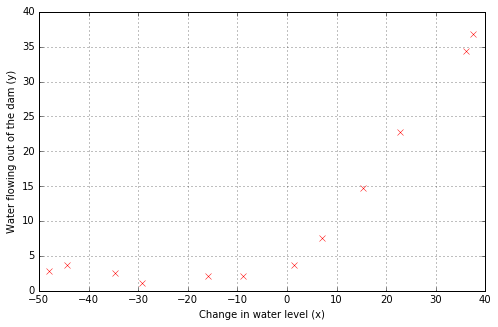

In [4]:
plt.figure(figsize=(8,5))
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X[:,1],y,'rx')
plt.grid(True)

### 1.2 Regularizing linear regression cost function

In [5]:
def hx(theta,X):
    return np.dot(X,theta)

In [6]:
theta=np.ones(X.shape[1])
def lin_cost(theta,X,y,lambda_val):
    m=len(y)
    J=(np.sum((hx(theta,X)-y.flatten())**2))/(2*m)+(np.sum(theta**2))*(lambda_val/(2*m))
    return J
lin_cost(theta,X,y,lambda_val)

303.95152555359761

In [7]:
def lin_grad(theta,X,y,lambda_val):
    m=len(y)
    grad=np.dot(hx(theta,X)-y.flatten(),X)/m
    for i in (range(1,theta.shape[0])):
        grad[i]+=(lambda_val/m)*theta[i]
    return grad
lin_grad(theta,X,y,lambda_val)

array([ -15.30301567,  598.16741084])

### 1.4 Fitting linear regression

In [31]:
def lin_reg(theta,X,y,lambda_val):
    new_thetas=scipy.optimize.fmin_cg(lin_cost,x0=theta,fprime=lin_grad,args=(X,y,lambda_val),maxiter=1000,disp=False,full_output=False)
    return new_thetas
new_thetas=lin_reg(theta,X,y,lambda_val)
new_thetas

array([ 13.08790734,   0.36777925])

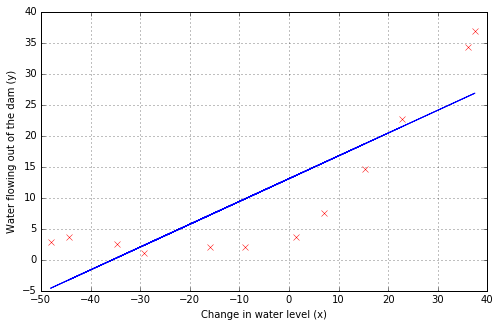

In [9]:
plt.figure(figsize=(8,5))
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X[:,1],y,'rx')
plt.grid(True)
plt.plot(X[:,1],hx(new_thetas,X).flatten())

## 2 Bias-variance

### 2.1 Learning curves

In [10]:
lin_reg(theta,X,y,lambda_val)

array([ 13.08790734,   0.36777925])

In [11]:
def learningCurve(theta,X,y,Xval,yval,lambda_val):
    '''Plot training and cross validation error as function of training set size'''
    m=len(y)
    error_train=np.zeros((m,1))
    error_cval=np.zeros((m,1))
    for i in range(m):
        theta_train=lin_reg(theta,X[:i+1],y[:i+1],lambda_val)
        error_train[i]=lin_cost(theta_train,X[:i+1],y[:i+1],lambda_val)
        error_cval[i]=lin_cost(theta_train,Xval,yval,lambda_val)
    return error_train,error_cval

There is too high bias. As the number of training examples increases, both the training error and validation error increase, signalling that there is high bias and a more complex model is needed

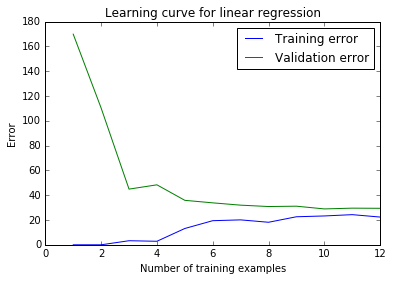

In [12]:
training_error,cval_error=learningCurve(theta,X,y,Xval,yval,lambda_val)
plt.plot(range(1,13),training_error, label='Training error')
plt.plot(range(1,13),cval_error, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

## 3 Polynomial regression

In [13]:
poly=sklearn.preprocessing.PolynomialFeatures(6)
X_poly=poly.fit_transform(X[:,1].reshape(-1,1)) #get polynomials
X_poly=sklearn.preprocessing.normalize(X_poly) #normalize features
theta_poly=np.ones((X_poly.shape[1]))

In [21]:
scipy.optimize.fmin_cg(lin_cost,x0=np.ones((X_poly.shape[1])),fprime=lin_grad,args=(X_poly,y,lambda_val))

         Current function value: 33.144039
         Iterations: 1400
         Function evaluations: 5190
         Gradient evaluations: 5190


array([ 3651.72171302,  4788.23329947,  6470.27246011, -8069.63897072,
        -610.74717852,   202.65879875,    14.86767554])

In [32]:
new_thetas=lin_reg(theta_poly,X_poly,y,0)
new_thetas

array([ 2732.60397369,  3584.99003813,  4809.32125328, -5704.3818595 ,
        -723.95336994,   178.38835864,    15.16522817])

In [17]:
theta_poly=np.ones((X_poly.shape[1]))